In [53]:
with open('nytimes.txt', 'r', encoding='utf8') as f:
    content = f.read()

In [59]:
import nltk
from nltk.corpus import stopwords
import re

In [20]:
# 전처리 목적의 사용자 정의 함수
def do_En_preprocessing(text, customized_stopwords):   #텍스트 & 직접 정의한 사용자 정의 불용어 사전
    cleaned_content = re.sub(r'[^\w\d\s]','',text) # 기호 없애기
    cleaned_content = cleaned_content.lower() # 소문자로 통일
    word_tokens = nltk.word_tokenize(cleaned_content) # Tokenization
    tokens_pos = nltk.pos_tag(word_tokens) # POS tagging
    NN_words = []   # To select nouns
    for word, pos in tokens_pos:
        if 'NN' in pos:
            NN_words.append(word)
            
    wlem = nltk.WordNetLemmatizer()   # Lemmatization
    lemmatized_words = []
    for word in NN_words:
        lemmatized_words.append(wlem.lemmatize(word))
    # 불용어 제거    
    stopwords_list = stopwords.words('english')
    unique_NN_words = set(lemmatized_words)
    final_NN_words = lemmatized_words.copy()
    for word in unique_NN_words:
        if word in stopwords_list:
            while word in final_NN_words: 
                final_NN_words.remove(word)
    
    unique_NN_words1 = set(final_NN_words)
    for word in unique_NN_words1:
        if word in customized_stopwords:
            while word in final_NN_words: 
                final_NN_words.remove(word)
    
    return final_NN_words

In [61]:
customized_stopwords = ['york', 'time', 'news']   # 직접 정의하는 사용자 불용어 사전

In [22]:
final_words = do_En_preprocessing(content, customized_stopwords)

In [23]:
print(final_words)

['hurray', 'hotblack', 'coffee', 'cafe', 'toronto', 'wifi', 'customer', 'cafe', 'city', 'location', 'café', 'grumpy', 'hotblacks', 'reason', 'blackout', 'cause', 'hosanna', 'president', 'jimson', 'bienenstock', 'aim', 'customer', 'device', 'vibe', 'vehicle', 'interaction', 'commodity', 'idea', 'bienenstock', 'science', 'decade', 'interaction', 'contributor', 'health', 'longevity', 'evidence', 'value', 'connection', 'morning', 'walk', 'woman', 'swim', 'locker', 'room', 'ymca', 'use', 'device', 'locker', 'room', 'experience', 'friend', 'share', 'joy', 'woman', 'problem', 'board', 'advice', 'counsel', 'laugh', 'brightens', 'day', 'study', 'life', 'harvard', 'health', 'watch', 'dozen', 'study', 'people', 'relationship', 'family', 'friend', 'community', 'health', 'problem', 'longer', 'study', 'men', 'woman', 'county', 'calif', 'lisa', 'berkman', 'leonard', 'syme', 'people', 'others', 'nineyear', 'study', 'people', 'tie', 'robbins', 'book', 'health', 'longevity', 'difference', 'survival', 'p

In [75]:
' '.join(final_words)

'hurray hotblack coffee cafe toronto wifi customer cafe city location café grumpy hotblacks reason blackout cause hosanna president jimson bienenstock aim customer device vibe vehicle interaction commodity idea bienenstock science decade interaction contributor health longevity evidence value connection morning walk woman swim locker room ymca use device locker room experience friend share joy woman problem board advice counsel laugh brightens day study life harvard health watch dozen study people relationship family friend community health problem longer study men woman county calif lisa berkman leonard syme people others nineyear study people tie robbins book health longevity difference survival people age gender health practice health status fact researcher tie lifestyle obesity lack exercise tie living habit robbins people lifestyle tie study journal medicine researcher health insurance plan men heart attack connection people quarter risk death year connectedness researcher duke un

## Frequency analysis using Counter

In [65]:
from collections import Counter
c = Counter(final_words)
print(c)

Counter({'health': 11, 'people': 11, 'researcher': 7, 'study': 6, 'tie': 6, 'interaction': 5, 'friend': 4, 'others': 4, 'exercise': 4, 'connection': 3, 'woman': 3, 'problem': 3, 'lifestyle': 3, 'lack': 3, 'heart': 3, 'death': 3, 'connectedness': 3, 'disease': 3, 'research': 3, 'inflammation': 3, 'texas': 3, 'seppala': 3, 'cafe': 2, 'customer': 2, 'reason': 2, 'bienenstock': 2, 'device': 2, 'longevity': 2, 'evidence': 2, 'locker': 2, 'room': 2, 'life': 2, 'men': 2, 'robbins': 2, 'book': 2, 'practice': 2, 'obesity': 2, 'habit': 2, 'journal': 2, 'risk': 2, 'university': 2, 'center': 2, 'condition': 2, 'mortality': 2, 'loneliness': 2, 'isolation': 2, 'blood': 2, 'pressure': 2, 'level': 2, 'stress': 2, 'wellbeing': 2, 'report': 2, 'behavior': 2, 'percent': 2, 'hurray': 1, 'hotblack': 1, 'coffee': 1, 'toronto': 1, 'wifi': 1, 'city': 1, 'location': 1, 'café': 1, 'grumpy': 1, 'hotblacks': 1, 'blackout': 1, 'cause': 1, 'hosanna': 1, 'president': 1, 'jimson': 1, 'aim': 1, 'vibe': 1, 'vehicle': 1

In [32]:
# 빈도 기준으로 top K 단어 선택
c.most_common(10)

[('health', 11),
 ('people', 11),
 ('researcher', 7),
 ('study', 6),
 ('tie', 6),
 ('interaction', 5),
 ('friend', 4),
 ('others', 4),
 ('exercise', 4),
 ('connection', 3)]

In [ ]:
!pip install wordcloud

In [67]:
print(final_words)

['hurray', 'hotblack', 'coffee', 'cafe', 'toronto', 'wifi', 'customer', 'cafe', 'city', 'location', 'café', 'grumpy', 'hotblacks', 'reason', 'blackout', 'cause', 'hosanna', 'president', 'jimson', 'bienenstock', 'aim', 'customer', 'device', 'vibe', 'vehicle', 'interaction', 'commodity', 'idea', 'bienenstock', 'science', 'decade', 'interaction', 'contributor', 'health', 'longevity', 'evidence', 'value', 'connection', 'morning', 'walk', 'woman', 'swim', 'locker', 'room', 'ymca', 'use', 'device', 'locker', 'room', 'experience', 'friend', 'share', 'joy', 'woman', 'problem', 'board', 'advice', 'counsel', 'laugh', 'brightens', 'day', 'study', 'life', 'harvard', 'health', 'watch', 'dozen', 'study', 'people', 'relationship', 'family', 'friend', 'community', 'health', 'problem', 'longer', 'study', 'men', 'woman', 'county', 'calif', 'lisa', 'berkman', 'leonard', 'syme', 'people', 'others', 'nineyear', 'study', 'people', 'tie', 'robbins', 'book', 'health', 'longevity', 'difference', 'survival', 'p

In [38]:
# 띄어쓰기를 기준으로 단어들을 연결하여 하나의 문자열 데이터로 표현
' '.join(final_words)

'hurray hotblack coffee cafe toronto wifi customer cafe city location café grumpy hotblacks reason blackout cause hosanna president jimson bienenstock aim customer device vibe vehicle interaction commodity idea bienenstock science decade interaction contributor health longevity evidence value connection morning walk woman swim locker room ymca use device locker room experience friend share joy woman problem board advice counsel laugh brightens day study life harvard health watch dozen study people relationship family friend community health problem longer study men woman county calif lisa berkman leonard syme people others nineyear study people tie robbins book health longevity difference survival people age gender health practice health status fact researcher tie lifestyle obesity lack exercise tie living habit robbins people lifestyle tie study journal medicine researcher health insurance plan men heart attack connection people quarter risk death year connectedness researcher duke un

## Word cloud

직사각형 형태로 시각화 해보기

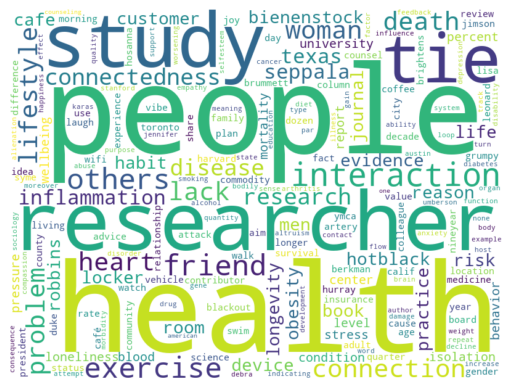

In [83]:
from wordcloud import WordCloud   #워드클라우드 클래스가 가지고 있는 함수 
import matplotlib.pyplot as plt

total_words = ' '.join(final_words)
# FONT_PATH = 'C:/Windows/Fonts/BROADW.ttf'
# 맥의 경우, FONT_PATH = "/System/Library/Fonts/영어폰트.ttc"
# 영어의 경우 폰트 경로를 설정하지 않아도 됨

wordcloud = WordCloud(max_font_size=200, width=800, height=600,     #워드클라우드의 생성자 함수
                      background_color='white')
                      # , font_path=FONT_PATH)
#워드클라우드가 갖고 있는 generate 함수 (각각의 단어들이 원소로 저장되어 있는 리스트 데이터를 전처리 결과물로 얻음)
#그런데 워드클라우드에서 제공되는 generate 함수는 리스트 데이터가 아닌, 단어들이 공백문자를 가지고 연결이 되어있는 하나의 문자열 값을 인자로 받음
#특정한 공백문자 ""로 연결된 하나의 문자열 값으로 만든 후에 generate 함수의 인자로 입력함
wordcloud.generate(total_words)          
#주피터 노트북에서는 우리가 원하는 해상도로 안 나옴. 정해져 있음. 따라서 to_file 함수를 통해 이미지 파일로 저장해야 함
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("nytimes.png") # to save at the working folder


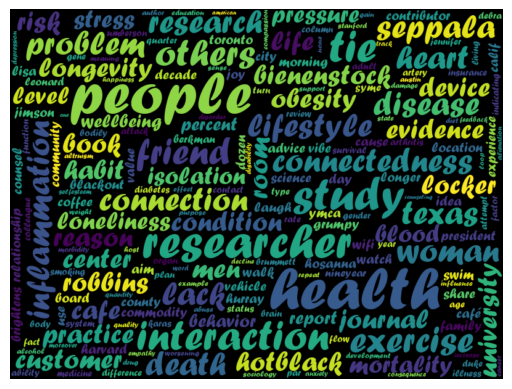

In [73]:
FONT_PATH = 'C:/Windows/Fonts/FORTE.ttf'
# 맥의 경우, /Library/Fonts 또는 /System/Library/Fonts

wordcloud = WordCloud(max_font_size=100, width=800, height=600, 
                      background_color='black',
                      font_path=FONT_PATH)
wordcloud.generate(' '.join(final_words))
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("nytimes.png") # to save at the working folder

원의 형태로 시각화 해보기

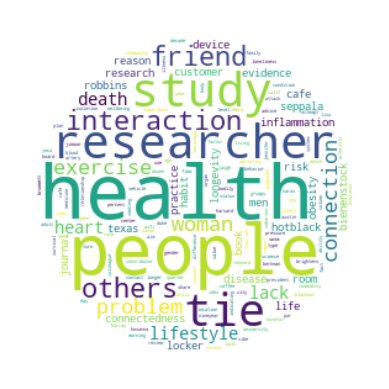

In [51]:
#교수님이 주신 워드클라우드 ppt (6주차)에 링크 있음. 그 링크에 이 코드가 그대로 있음

import numpy as np
x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color='white', repeat=True, mask=mask)
wc.generate(' '.join(final_words))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()
wc.to_file("circle.png")

마스크 이미지를 배경으로 시각화 하기

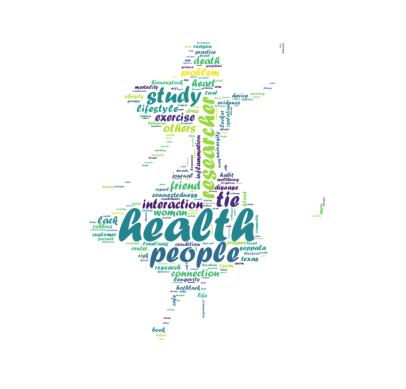

In [130]:
from PIL import Image   #파이썬 이미지 라이브러리 클래스
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud

# 마스크 이미지를 불러온 후, 넘파이의 어레이 형태로 변환합니다.
image_mask = np.array(Image.open("alice_mask.png"))
image_mask[image_mask>0]=255
# 숫자 0은 검은색을 255는 흰색을 의미
# 완전 흰색이 아닌 부분을 흰색으로 변환
# WordCloud는 완전 흰색이 아닌 부분을 mask 로 사용하기 때문

FONT_PATH = 'C:/Windows/Fonts/FORTE.ttf'

# WordCloud() 생성자 함수의 mask 파라미터를 해당 alice_mask로 지정합니다.
wc1 = WordCloud(max_font_size=100, background_color="white", 
                width=674, height=643,
                mask=image_mask, 
                font_path = FONT_PATH)

# generate word cloud
wc1.generate(' '.join(final_words))

# store to file
wc1.to_file("alice_wc.png")

plt.figure()
plt.imshow(wc1)
plt.axis("off")
plt.show()

In [117]:
image_mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

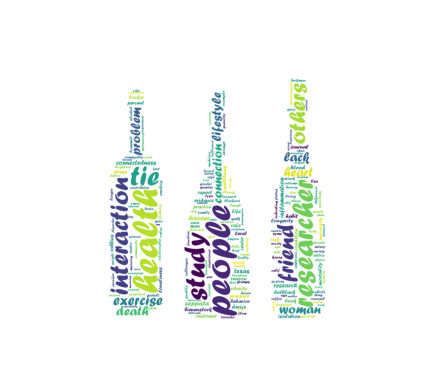

In [132]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud

# 마스크 이미지를 불러온 후, 넘파이의 어레이 형태로 변환합니다.
image_mask = np.array(Image.open("bottle_mask.jpeg"))   #쓰고자 하는 백그라운드 이미지는 이 파라미터 (빨간색 글씨)만 바꾸면 됨
image_mask[image_mask>0]=255
# 숫자 0은 검은색을 255는 흰색을 의미
# 완전 흰색이 아닌 부분을 흰색으로 변환 (# 255가 아닌 흰색을 255로 바꿔야 함)
# WordCloud는 완전 흰색이 아닌 부분을 mask 로 사용하기 때문
# 255가 아닌 셀에 (흰색 비스무리한 것) 시각화가 나오면 곤란함

FONT_PATH = 'C:/Windows/Fonts/FORTE.ttf'

# WordCloud() 생성자 함수의 mask 파라미터를 해당 alice_mask로 지정합니다.
wc1 = WordCloud(max_font_size=100, background_color="white", 
                width=674, height=643,
                mask=image_mask, 
                font_path = FONT_PATH)

# generate word cloud
wc1.generate(' '.join(final_words))

# store to file
wc1.to_file("bottle_wc.png")

plt.figure()
plt.imshow(wc1)
plt.axis("off")
plt.show()

### 빈도순으로 상위 K의 단어만을 이용해서 wordcloud 시각화를 하고자 하는 경우

In [121]:
c = Counter(final_words)
fre_dict={}
for word, fre in c.most_common(30):
    fre_dict[word]=fre

In [18]:
print(fre_dict)

{'health': 11, 'people': 11, 'researcher': 7, 'study': 6, 'tie': 6, 'interaction': 5, 'friend': 4, 'others': 4, 'exercise': 4, 'connection': 3, 'woman': 3, 'problem': 3, 'lifestyle': 3, 'lack': 3, 'heart': 3, 'death': 3, 'connectedness': 3, 'disease': 3, 'research': 3, 'inflammation': 3, 'texas': 3, 'seppala': 3, 'cafe': 2, 'customer': 2, 'reason': 2, 'bienenstock': 2, 'device': 2, 'longevity': 2, 'evidence': 2, 'locker': 2}


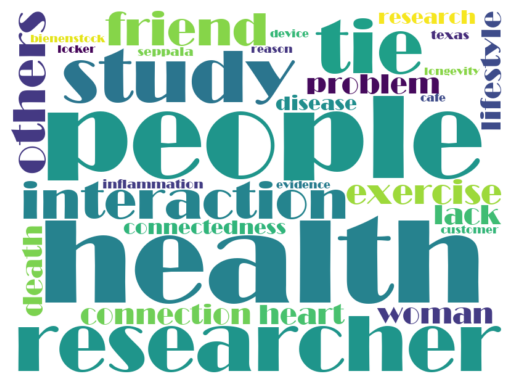

In [19]:
FONT_PATH = 'C:/Windows/Fonts/BROADW.ttf'

wordcloud = WordCloud(max_font_size=200, width=800, height=600, 
                      background_color='white', font_path=FONT_PATH)
    
# wordcloud.generate(' '.join(final_nouns)) 
wordcloud.generate_from_frequencies(fre_dict)
# generate() 는 하나의 문자열 값을 인자로 입력 받음
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()